In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
import xgboost as xgb

df = pd.read_csv('./../data/data_normal.csv')

In [3]:
X = df.drop(['school_name', 'program_name', 'campus_location', 'state', 'reporting_start', 'reporting_end',
       'employed_infield_180days', 'employed_infield_90days', 'not_seeking_infield_90days','graduated_ontime',
       'not_seeking_infield_180days', 'still_seeking_infield_90days',
       'still_seeking_infield_180days', 'median_annual_salary90days',
       'median_annual_salary180days', 'under70K_90days', 'under70K_180days',
       'salary_70K_80K_90days', 'salary_70K_80K_180days',
       'salary_80K_90K_90days', 'salary_80K_90K_180days', 'over90K_90days','graduates_included',
       'over90K_180days'], axis = 1)
y = df['employed_infield_180days']

In [4]:
imputer = SimpleImputer()
X_imputed = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=48)

In [27]:
xg_reg = xgb.XGBRegressor(seed=123, objective="reg:linear", n_estimators=10, booster='gbtree')
xg_reg.fit(X_train, y_train)



[23:21:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [28]:
pred = xg_reg.predict(X_test)

In [29]:
rmse = np.sqrt(mean_squared_error(pred,y_test))
print("RMSE: %f" % (rmse))

RMSE: 15.460895


In [8]:
#Regularization

[23:16:53] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


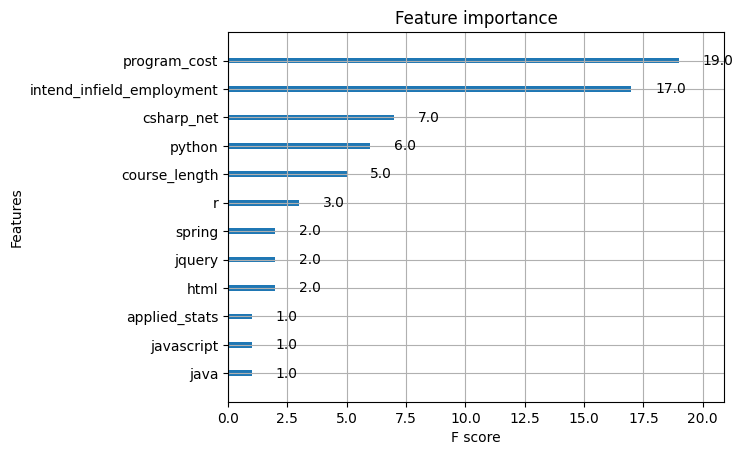

In [23]:
bootcamps_dmatrix = xgb.DMatrix(data=X, label=y)
params =  {"objective" : "reg:linear"}
xg_reg = xgb.train(params=params, dtrain=bootcamps_dmatrix, num_boost_round=10)

xgb.plot_importance(xg_reg)
plt.show()

### Untuned Model Example

In [10]:
bootcamps_matrix = xgb.DMatrix(data=X, label=y)
untuned_params={"objective":"reg:linear"}
untuned_cv_results_rmse = xgb.cv(dtrain=bootcamps_matrix,params=untuned_params, nfold=4, metrics='rmse', as_pandas=True, seed=123)
print("Untuned rmse: %f" %((untuned_cv_results_rmse["test-rmse-mean"]).tail(1)))

[23:04:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[23:04:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[23:04:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[23:04:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Untuned rmse: 10.509120


### Tuned Model Example

In [11]:
tuned_params = {"objective" : "reg:linear", 'colsample_bytree': 0.4, 'learning_rate':0.1, 'max_depth': 9, 'eta':0.1, "subsample":0.9,'gamma':0.9}
tuned_cv_results_rmse = xgb.cv(dtrain=bootcamps_matrix, params=tuned_params, nfold=5,early_stopping_rounds = 10, num_boost_round=200, metrics="rmse", as_pandas=True, seed=123)
print("Tuned rmse: %f" %((tuned_cv_results_rmse["test-rmse-mean"]).tail(1)))

[23:04:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[23:04:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[23:04:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[23:04:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[23:04:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regress

In [30]:
tuned_cv_results_rmse

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,72.285041,0.696762,72.222736,3.202309
1,65.371007,0.668048,65.303673,3.173980
2,59.161047,0.613056,59.089530,3.170716
3,53.546762,0.536156,53.471456,3.169539
4,48.522171,0.487751,48.444204,3.141183
5,44.031681,0.442001,43.952818,3.143041
6,40.009711,0.400434,39.932381,3.121580
7,36.403535,0.365432,36.413234,3.008710
8,33.176360,0.364872,33.204076,2.867563
9,30.281782,0.328593,30.430686,2.724118


In [12]:
y_pred = xg_reg.predict(bootcamps_matrix)

In [18]:

y_actual = np.array(y_test)

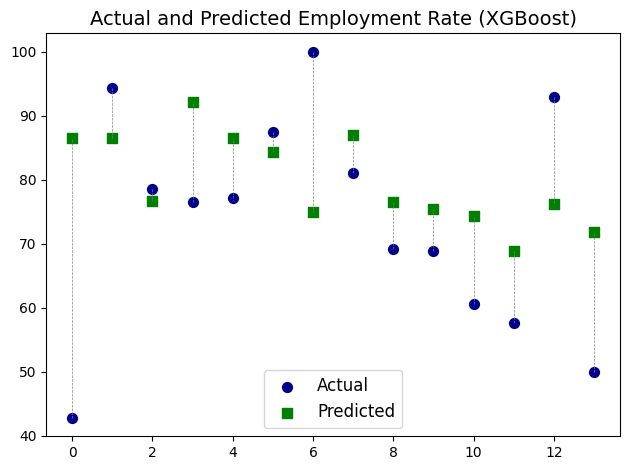

In [24]:
# Calculate the differences between actual and predicted values
differences = y_actual - y_pred

# Plot the actual and predicted values
plt.scatter(range(len(y_actual)), y_actual, color='darkblue', label='Actual', marker='o', s=50)
plt.scatter(range(len(y_pred)), y_pred, color='green', label='Predicted', marker='s', s=50)

# Plot lines connecting the actual and predicted values
for i in range(len(y_actual)):
    plt.plot([i, i], [y_actual[i], y_pred[i]], color='gray', linestyle='--', linewidth=0.5)

plt.legend(fontsize=12)
plt.title('Actual and Predicted Employment Rate (XGBoost)', fontsize=14)
plt.tight_layout()
#plt.savefig("/Users/anastasiyaayala/Desktop/bootcamps_edu/images/image3.png");


In [31]:
rmse = np.sqrt(mean_squared_error(y_pred,y_test))
print("RMSE: %f" % (rmse))

RMSE: 17.208814
